In [541]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [542]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                        AND "Period covered by return (months)" = 12
                        AND READPROG is NOT NULL
                        AND WRITPROG is NOT NULL
                        AND MATPROG is NOT NULL
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    ON (s.UID = a.TRUST_UID)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" is NULL
                        AND "FTE Students" > 0
                        AND "Period covered by return" = 12
                        AND READPROG is NOT NULL
                        AND WRITPROG is NOT NULL
                        AND MATPROG is NOT NULL
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


Source       URN           Region London Borough  \
0      academies  137881.0       South East        Neither   
1      academies  137882.0       South East        Neither   
2      academies  147280.0       South East        Neither   
3      academies  138761.0    East Midlands        Neither   
4      academies  147363.0           London          Inner   
...          ...       ...              ...            ...   
13084    schools  115750.0       South West        Neither   
13085    schools  117254.0  East of England        Neither   
13086    schools  117336.0  East of England        Neither   
13087    schools  121053.0  East of England        Neither   
13088    schools  112340.0       North West        Neither   

                                     School Name                         Type  \
0               Oaks Primary Academy - Maidstone          Academy sponsor led   
1                      Tree Tops Primary Academy          Academy sponsor led   
2                     Horsmonden Primary Academy            Academy converter   
3                 Gretton Primary School - Corby            Academy converter   
4      Haberdashers' Aske's Knights Temple Grove            Academy converter   
...                                          ...                          ...   
13084                Carrant Brook Junior School            Foundation school   
13085       Westfield Primary School and Nursery             Community school   
13086                Holtsmere End Junior School             Community school   
13087               Salhouse CofE Primary School  Voluntary controlled school   
13088       St Patrick's Catholic Primary School       Voluntary aided school   

      Overall Phase  ...  MATPROG_19  READPROG_22  WRITPROG_22  MATPROG_22  \
0           Primary  ...         NaN          NaN          NaN         NaN   
1           Primary  ...         NaN          NaN          NaN         NaN   
2           Primary  ...         NaN          NaN          NaN         NaN   
3           Primary  ...         NaN          NaN          NaN         NaN   
4           Primary  ...         NaN          NaN          NaN         NaN   
...             ...  ...         ...          ...          ...         ...   
13084       Primary  ...        -1.6          NaN          NaN         NaN   
13085       Primary  ...        -1.2          NaN          NaN         NaN   
13086       Primary  ...        -1.4          NaN          NaN         NaN   
13087       Primary  ...        -4.9          NaN          NaN         NaN   
13088       Primary  ...        -3.2          NaN          NaN         NaN   

       READPROG  WRITPROG  MATPROG  
0           1.4       1.3      1.9  
1           1.4       1.3      1.9  
2           1.4       1.3      1.9  
3          -1.1      -1.6      0.1  
4           3.2       2.7      3.8  
...         ...       ...      ...  
13084      -1.5      -1.3     -1.5  
13085       1.2      -4.3     -2.5  
13086       0.1       1.5      0.1  
13087      -3.1      -0.8     -5.1  
13088      -2.1       0.5     -2.6  

[13089 rows x 33 columns]

In [543]:
# calculate schools in/out of london. 


In [544]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [545]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


Source       URN           Region London Borough  \
0      academies  137881.0       South East        Neither   
1      academies  137882.0       South East        Neither   
2      academies  147280.0       South East        Neither   
3      academies  138761.0    East Midlands        Neither   
4      academies  147363.0           London          Inner   
...          ...       ...              ...            ...   
13084    schools  115750.0       South West        Neither   
13085    schools  117254.0  East of England        Neither   
13086    schools  117336.0  East of England        Neither   
13087    schools  121053.0  East of England        Neither   
13088    schools  112340.0       North West        Neither   

                                     School Name                         Type  \
0               Oaks Primary Academy - Maidstone          Academy sponsor led   
1                      Tree Tops Primary Academy          Academy sponsor led   
2                     Horsmonden Primary Academy            Academy converter   
3                 Gretton Primary School - Corby            Academy converter   
4      Haberdashers' Aske's Knights Temple Grove            Academy converter   
...                                          ...                          ...   
13084                Carrant Brook Junior School            Foundation school   
13085       Westfield Primary School and Nursery             Community school   
13086                Holtsmere End Junior School             Community school   
13087               Salhouse CofE Primary School  Voluntary controlled school   
13088       St Patrick's Catholic Primary School       Voluntary aided school   

      Overall Phase  ...  WRITPROG_22  MATPROG_22  READPROG  WRITPROG  \
0           Primary  ...          NaN         NaN       1.4       1.3   
1           Primary  ...          NaN         NaN       1.4       1.3   
2           Primary  ...          NaN         NaN       1.4       1.3   
3           Primary  ...          NaN         NaN      -1.1      -1.6   
4           Primary  ...          NaN         NaN       3.2       2.7   
...             ...  ...          ...         ...       ...       ...   
13084       Primary  ...          NaN         NaN      -1.5      -1.3   
13085       Primary  ...          NaN         NaN       1.2      -4.3   
13086       Primary  ...          NaN         NaN       0.1       1.5   
13087       Primary  ...          NaN         NaN      -3.1      -0.8   
13088       Primary  ...          NaN         NaN      -2.1       0.5   

       MATPROG  Income per Student  Expenditure per Student  
0          1.9         6950.248756              5691.542289  
1          1.9         6200.704225              5309.859155  
2          1.9         5720.779221              5240.259740  
3          0.1         5181.818182              5000.000000  
4          3.8         8910.614525              8491.620112  
...        ...                 ...                      ...  
13084     -1.5         6682.685460              6279.509018  
13085     -2.5         6018.482850              6398.844879  
13086      0.1         5715.225294              6169.336387  
13087     -5.1         6571.176232              6598.271087  
13088     -2.6         6224.345174              6352.372587  

[13089 rows x 35 columns]

In [546]:
df[['Source','URN']].groupby('Source').count()

URN
Source         
academies  4522
schools    8567

In [547]:
df[['London Borough','URN']].groupby('London Borough').count()

URN
London Borough       
Inner             619
Neither         11561
Outer             909

In [548]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: inf
Median IE Ratio: 0.9961100387874777
Min IE Ratio: 0.0
Max IE Ratio: inf
STD IE Ratio: nan


/Users/andrewmccall/projects/tessa/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [549]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_total_ratio(col, df):
    df[col + ' vs Total Expenditure Ratio'] = df[col] / df['Total Expenditure']
def create_staff_ratio(col, df):
    df[col + ' vs Staff Cost Ratio'] = df[col] / df['Total Expenditure']
def create_student_ratio(col, df):
    df[col + ' vs FTE Students Ratio'] = df[col] / df['FTE Students']

In [550]:

df['Student Buckets'].unique()

[400, 200, 800, 600, 1000, 1200, 1400, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [551]:
df[['Student Buckets', 'URN']].groupby('Student Buckets').count()

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/2608495302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Student Buckets', 'URN']].groupby('Student Buckets').count()


URN
Student Buckets      
200              4198
400              5655
600              2575
800               566
1000               80
1200               11
1400                3
1600                1

In [552]:
create_total_ratio('Teaching Staff', df)
create_total_ratio('Supply Staff Costs', df)
create_total_ratio('Education support staff', df)
create_total_ratio('Other Staff Costs', df)
create_total_ratio('Total Staff Costs', df)
create_total_ratio('Maintenance & Improvement Costs', df)
create_total_ratio('Energy', df)
create_total_ratio('Total Costs of Educational Supplies', df)
create_total_ratio('Catering supplies', df)

create_staff_ratio('Teaching Staff', df)
create_staff_ratio('Supply Staff Costs', df)
create_staff_ratio('Education support staff', df)
create_staff_ratio('Other Staff Costs', df)

create_student_ratio('Total Expenditure', df)
create_student_ratio('Teaching Staff', df)
create_student_ratio('Supply Staff Costs', df)
create_student_ratio('Education support staff', df)
create_student_ratio('Other Staff Costs', df)
create_student_ratio('Total Staff Costs', df)
create_student_ratio('Maintenance & Improvement Costs', df)
create_student_ratio('Energy', df)
create_student_ratio('Total Costs of Educational Supplies', df)
create_student_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

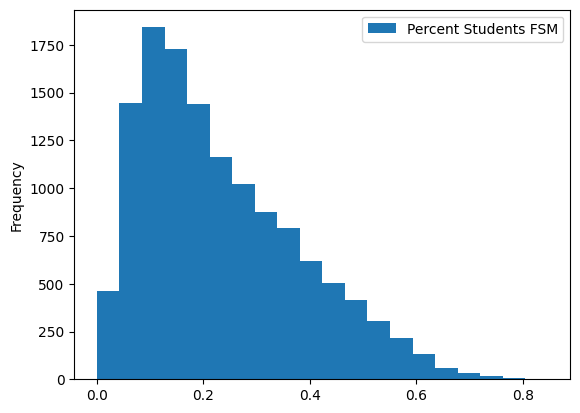

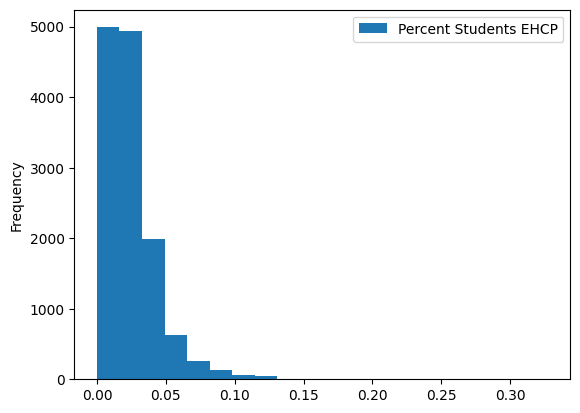

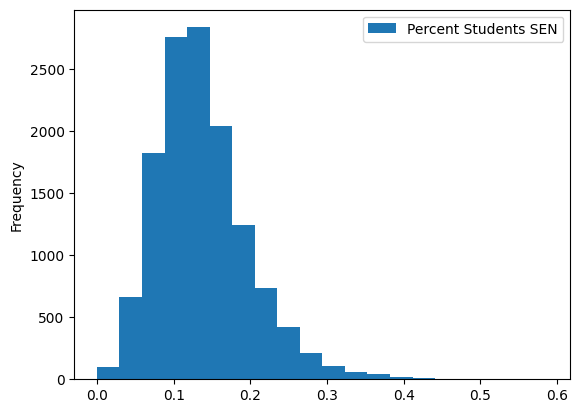

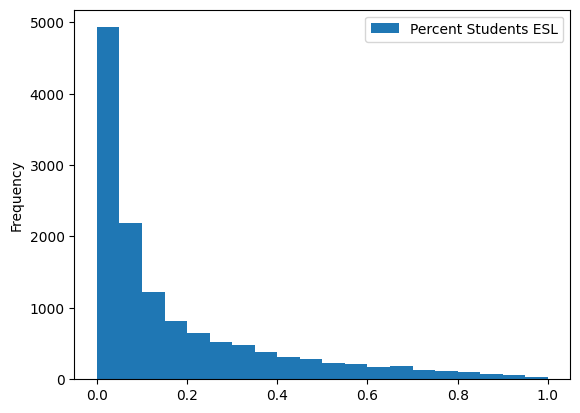

In [553]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

In [554]:
def plot_student_groups(col): 
    df.plot.scatter(x='Percent Students FSM', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students FSM': {df[col].corr(df['Percent Students FSM'])}" )
    df.plot.scatter(x='Percent Students EHCP', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students EHCP':  {df[col].corr(df['Percent Students EHCP'])}" )
    df.plot.scatter(x='Percent Students SEN', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students SEN':  {df[col].corr(df['Percent Students SEN'])}" )
    df.plot.scatter(x='Percent Students ESL', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students ESL':  {df[col].corr(df['Percent Students ESL'])}" )    

Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.03437955537710687
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.06507517419967267
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.027365886513413668
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  0.02396410671249557


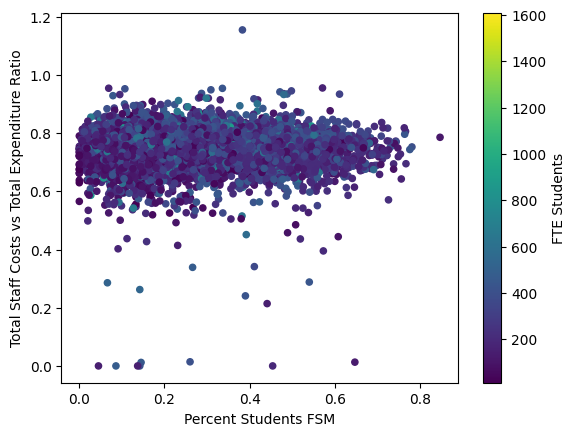

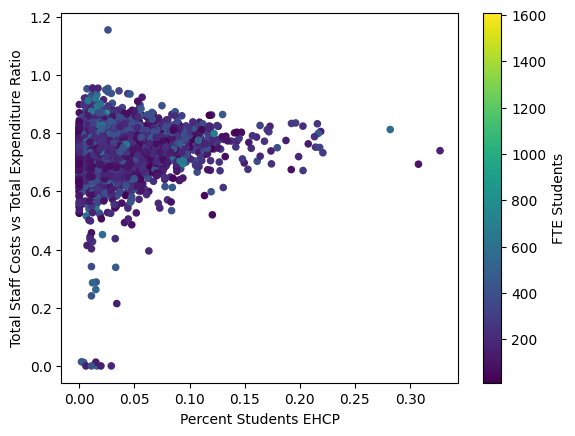

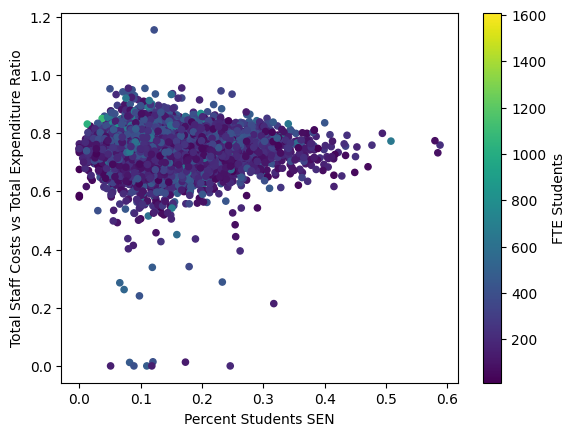

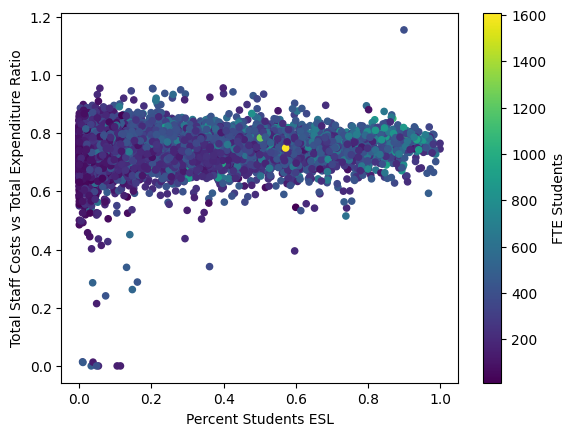

In [555]:
plot_student_groups('Total Staff Costs vs Total Expenditure Ratio')


Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students FSM': -0.2222662050893327
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.14818835033297278
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.1386577684306223
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.10816822410610757
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students FSM': -0.2222662050893327
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.14818835033297278
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students SEN':  -0.1386577684306223
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students ESL':  -0.10816822410610757


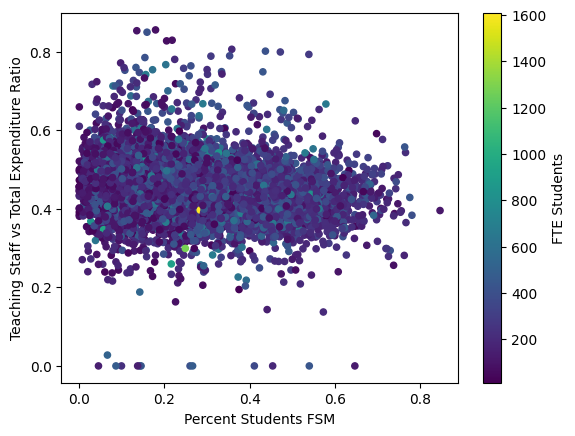

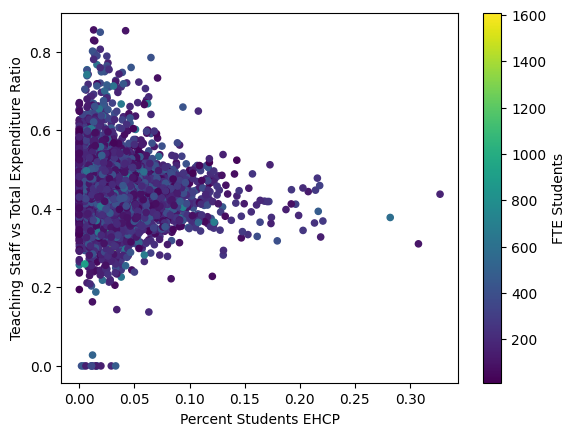

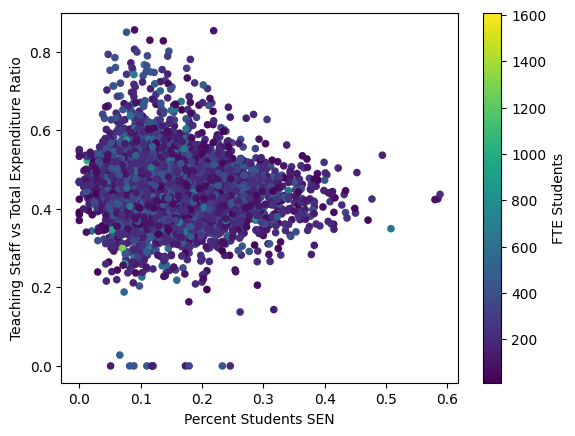

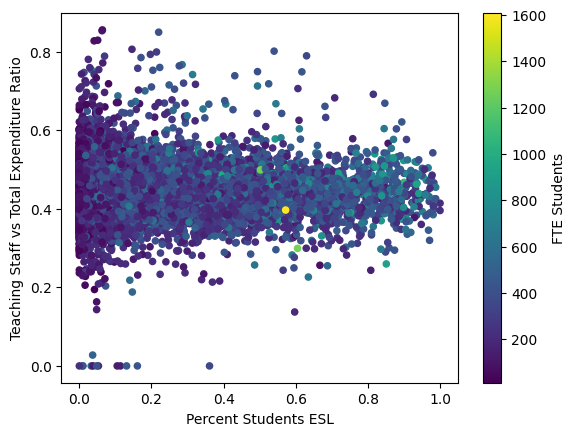

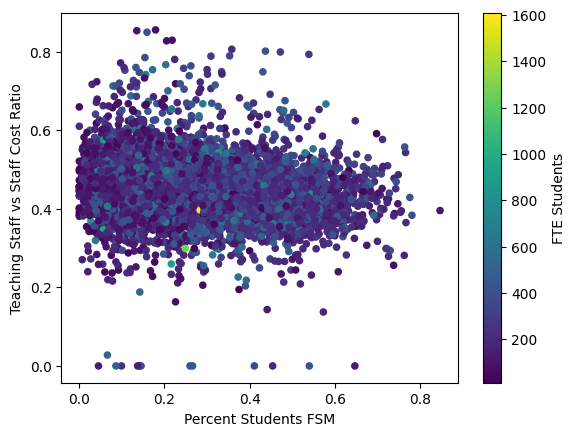

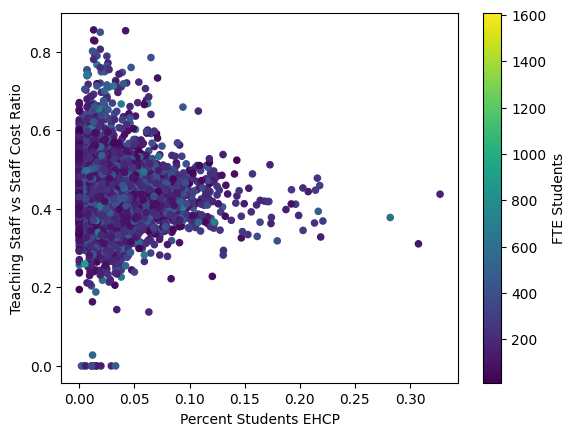

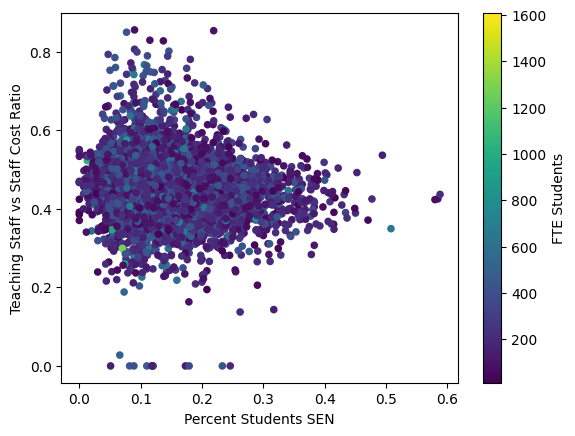

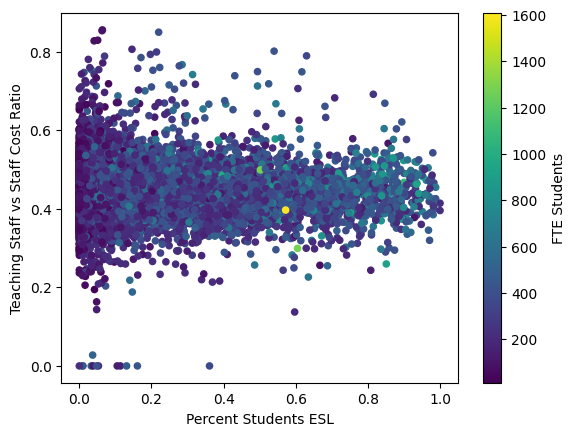

In [556]:
plot_student_groups('Teaching Staff vs Total Expenditure Ratio')
plot_student_groups('Teaching Staff vs Staff Cost Ratio')

Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students FSM': 0.18648962386210274
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.2543474354239063
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students SEN':  0.10946735407476402
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students ESL':  0.09392523456934622
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students FSM': 0.18648962386210274
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students EHCP':  0.2543474354239063
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students SEN':  0.10946735407476402
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students ESL':  0.09392523456934622


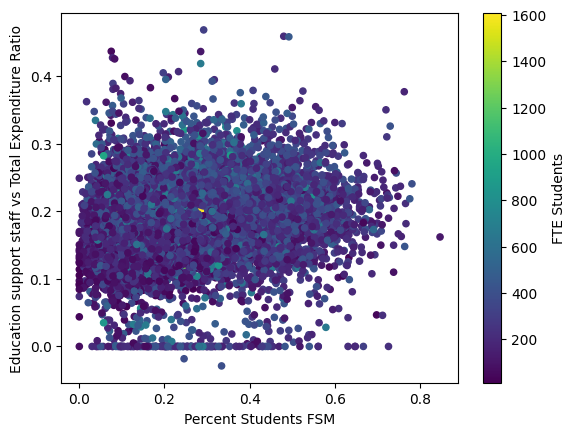

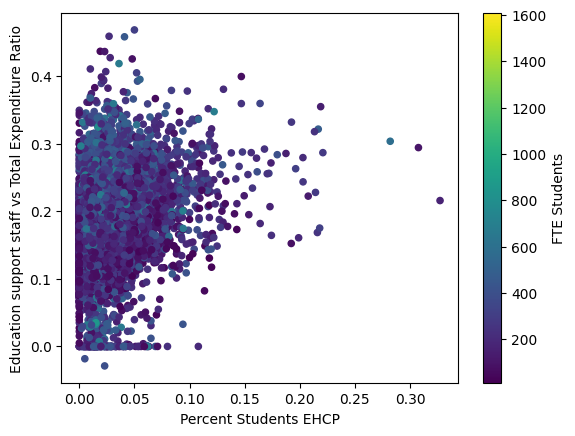

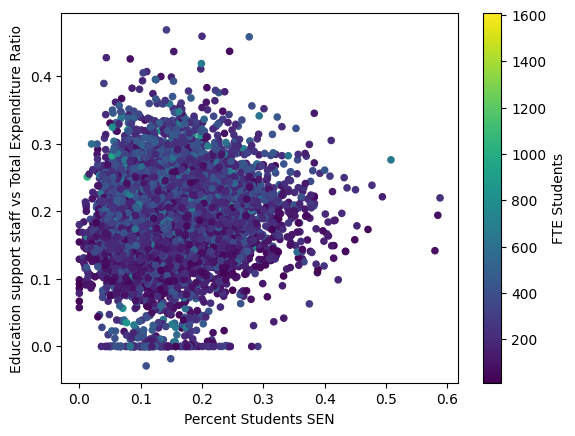

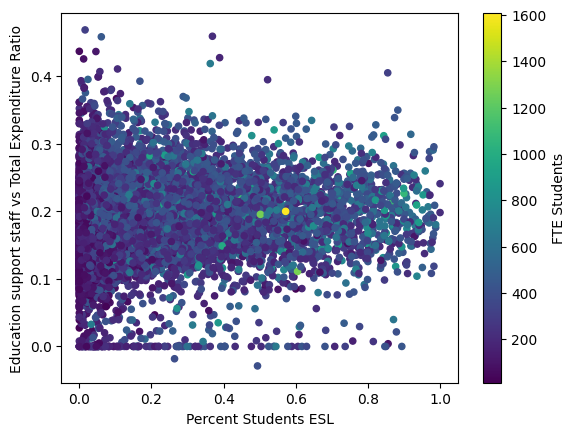

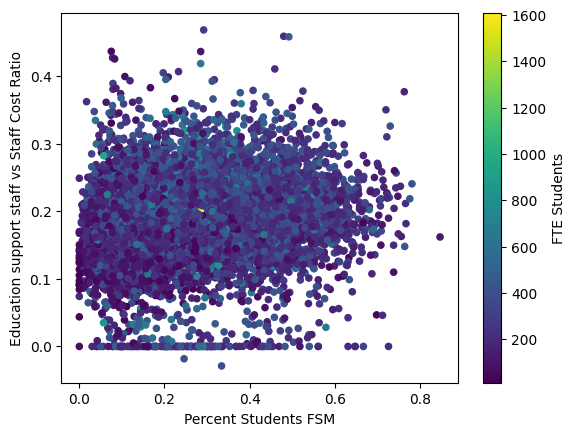

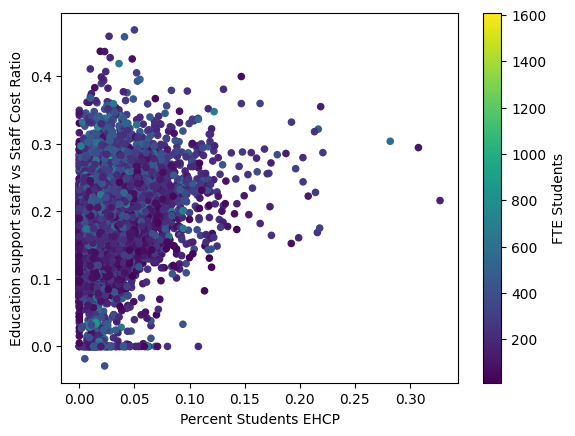

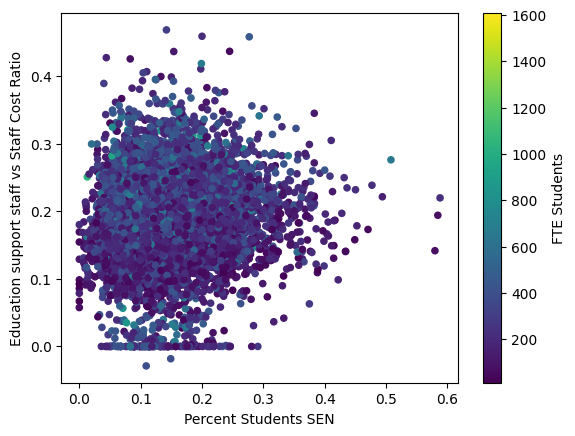

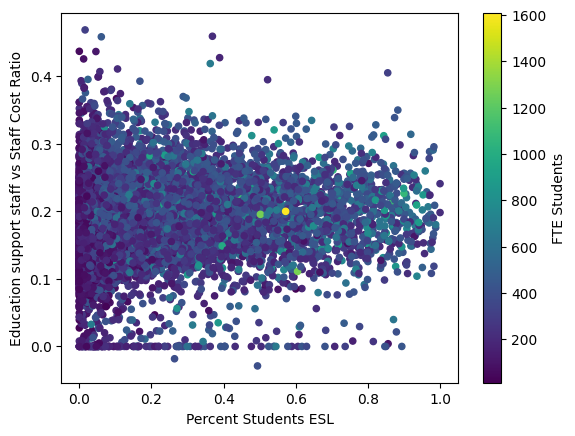

In [557]:
plot_student_groups('Education support staff vs Total Expenditure Ratio')
plot_student_groups('Education support staff vs Staff Cost Ratio')

Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.05293672928626498
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.04462418275485847
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.03444218915297466
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.04196588577130081
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students FSM': -0.05293672928626498
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.04462418275485847
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students SEN':  -0.03444218915297466
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students ESL':  -0.04196588577130081


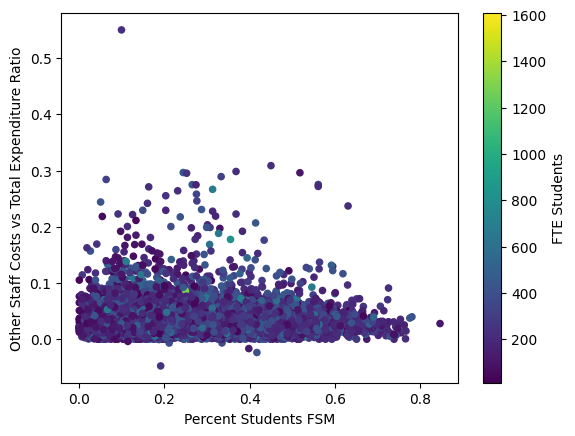

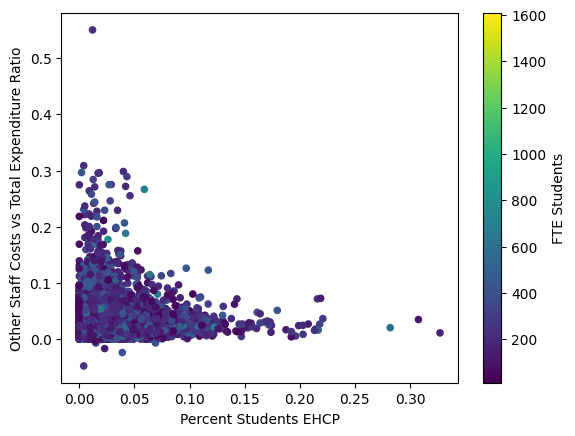

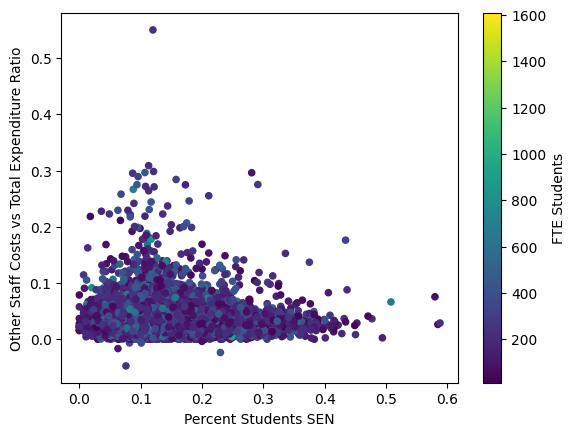

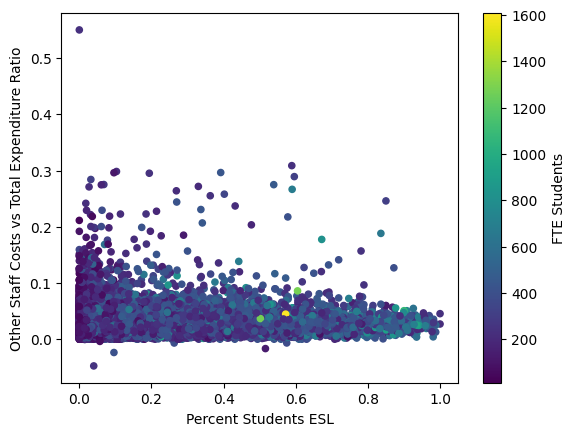

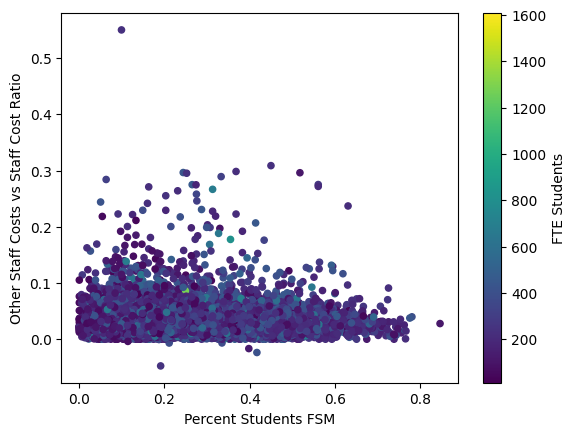

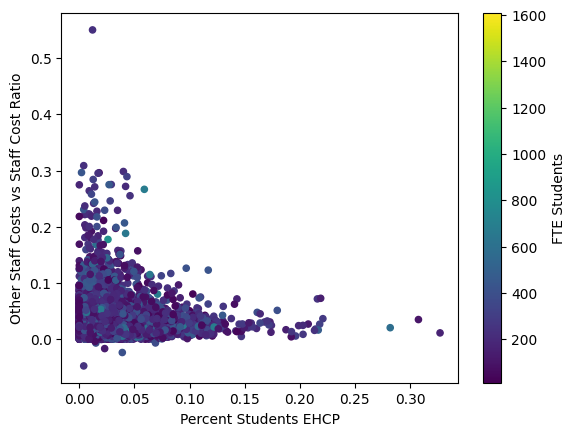

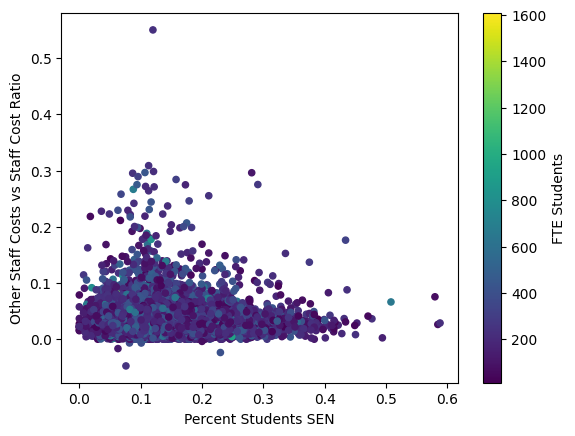

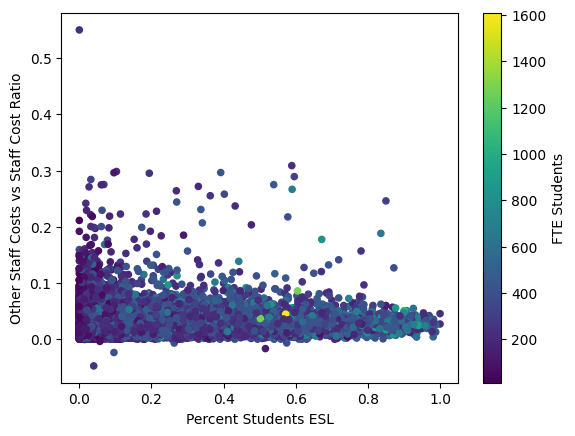

In [558]:
plot_student_groups('Other Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Other Staff Costs vs Staff Cost Ratio')

Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students FSM': -0.1434940754103031
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.07894106047507472
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.050482618888124935
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.1872924280990615


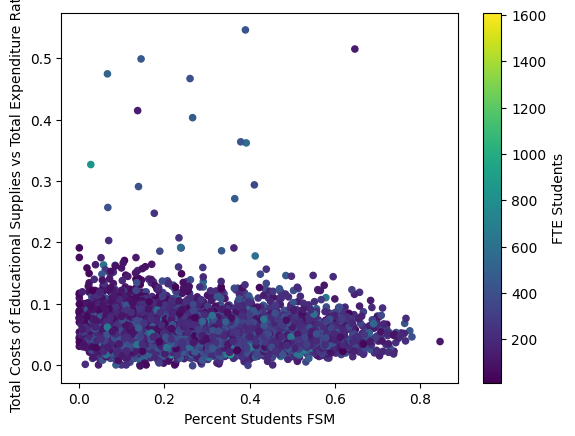

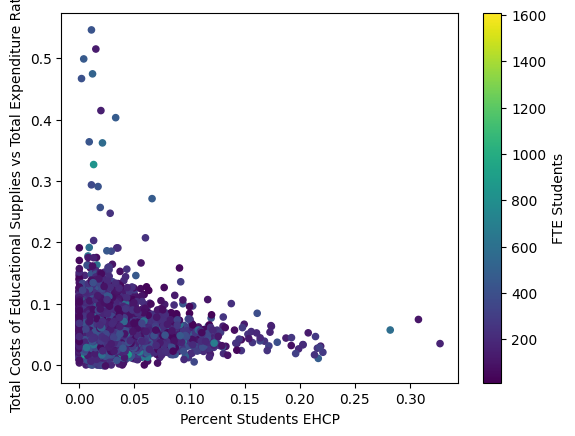

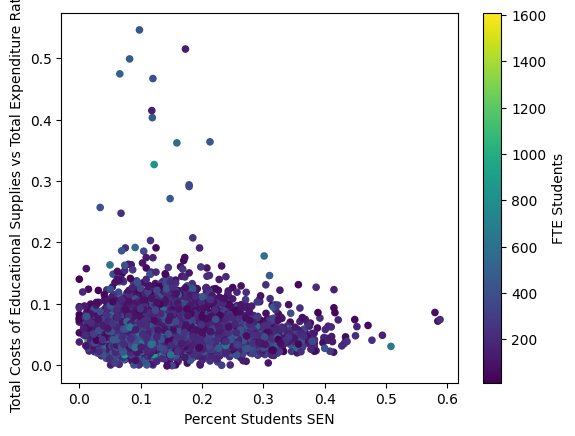

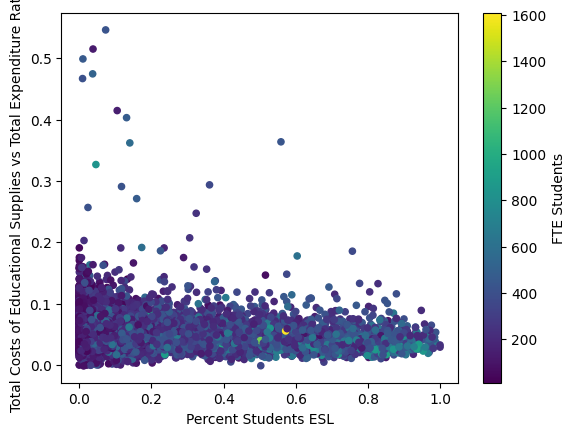

In [559]:
plot_student_groups('Total Costs of Educational Supplies vs Total Expenditure Ratio')

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

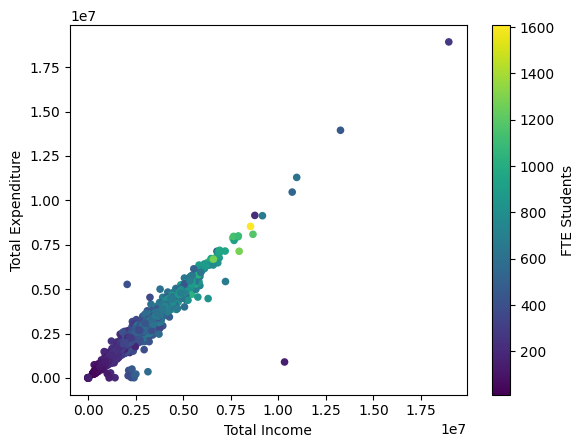

In [560]:
df.plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [561]:
df['Total Expenditure'].corr(df['Total Income'])

0.985874356146905

In [562]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

URN                                School Name  Classroom Staff  \
0      137881.0           Oaks Primary Academy - Maidstone        944000.00   
1      137882.0                  Tree Tops Primary Academy       1226000.00   
2      147280.0                 Horsmonden Primary Academy        624000.00   
3      138761.0             Gretton Primary School - Corby        526000.00   
4      147363.0  Haberdashers' Aske's Knights Temple Grove        824000.00   
...         ...                                        ...              ...   
13084  115750.0                Carrant Brook Junior School        775025.37   
13085  117254.0       Westfield Primary School and Nursery        888551.09   
13086  117336.0                Holtsmere End Junior School        943743.05   
13087  121053.0               Salhouse CofE Primary School        512686.54   
13088  112340.0       St Patrick's Catholic Primary School        818791.44   

       Total Staff Costs  Other Staff Costs  
0              984000.00           13000.00  
1             1275000.00            3000.00  
2              667000.00           22000.00  
3              588000.00           25000.00  
4             1126000.00            8000.00  
...                  ...                ...  
13084          841169.47           13443.84  
13085          988144.55           28324.34  
13086         1056732.86           67012.10  
13087          550273.68           18131.87  
13088          952228.54           71406.95  

[13089 rows x 5 columns]

<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

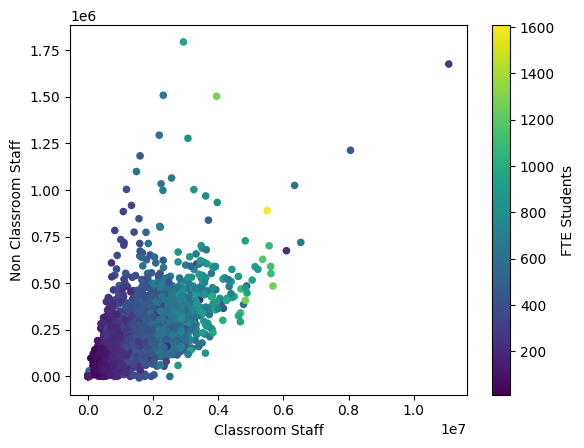

In [563]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

In [564]:
df['Non Classroom Staff'].corr(df['Total Expenditure'])

0.7873087368738954

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

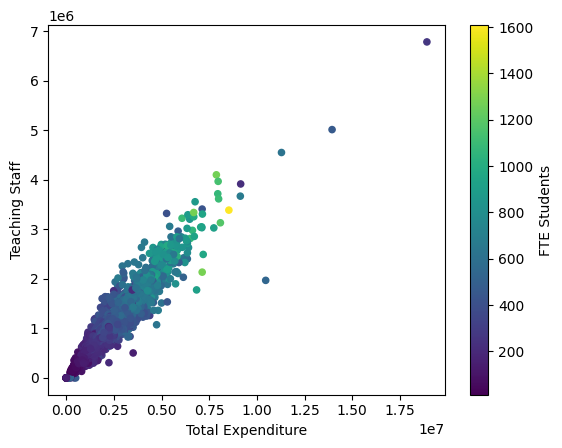

In [565]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [566]:
df['Teaching Staff'].corr(df['Total Expenditure'])

0.9655119728219123

In [567]:
def show_stats (col):
    agg_func_math = {
        col + ' vs Total Expenditure Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff vs Total Expenditure Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                  0.46   0.46  0.14  0.86   
400                                                  0.45   0.45  0.14  0.81   
600                                                  0.46   0.46  0.03  0.85   
800                                                  0.46   0.46  0.23  0.77   
1000                                                 0.46   0.46  0.26  0.58   
1200                                                 0.46   0.45  0.39  0.53   
1400                                                 0.44   0.50  0.30  0.52   
1600                                                 0.40   0.40  0.40  0.40   

                             
                  std   var  
Student Buckets              
200              0.06  0.00  
400              0.06  0.00  
600              0.06  0.00  
800              0.06  0.00  
1000             0.06  0.00  
1200             0.04  0.00  
1400             0.12  0.01  
1600              NaN   NaN

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

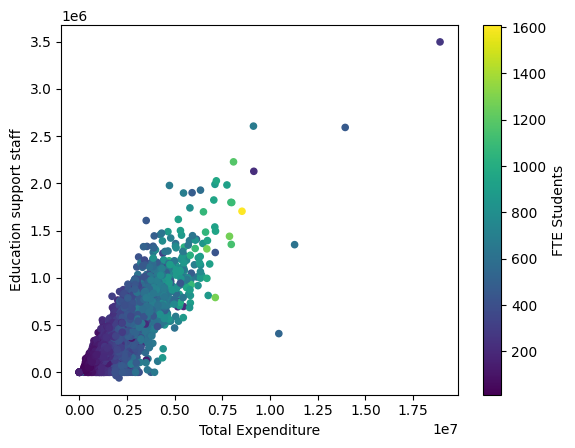

In [568]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [569]:
df['Education support staff'].corr(df['Total Expenditure'])

0.8885664017013885

In [570]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff vs Total Expenditure Ratio         \
                                                              mean median   
Student Buckets                                                             
200                                                           0.17   0.17   
400                                                           0.19   0.19   
600                                                           0.20   0.20   
800                                                           0.20   0.20   
1000                                                          0.19   0.19   
1200                                                          0.22   0.22   
1400                                                          0.16   0.18   
1600                                                          0.20   0.20   

                                        
                  min   max   std  var  
Student Buckets                         
200              0.00  0.44  0.05  0.0  
400              0.00  0.47  0.05  0.0  
600              0.00  0.46  0.05  0.0  
800              0.01  0.42  0.05  0.0  
1000             0.04  0.32  0.06  0.0  
1200             0.16  0.28  0.04  0.0  
1400             0.11  0.20  0.05  0.0  
1600             0.20  0.20   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

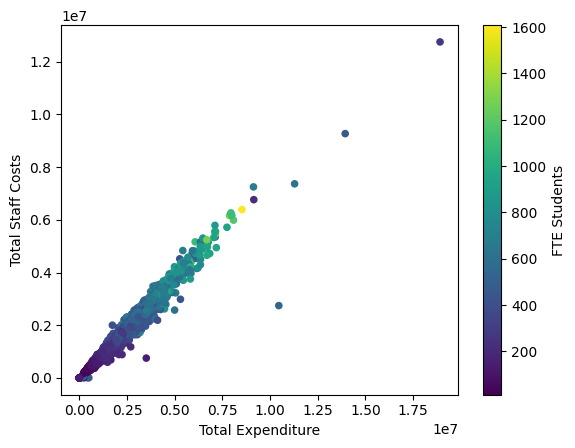

In [571]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [572]:
df['Total Staff Costs'].corr(df['Total Expenditure'])

0.9896638480986728

In [573]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.74   0.75  0.01   
400                                                     0.75   0.76  0.34   
600                                                     0.76   0.77  0.01   
800                                                     0.77   0.77  0.52   
1000                                                    0.76   0.76  0.59   
1200                                                    0.78   0.77  0.72   
1400                                                    0.78   0.78  0.76   
1600                                                    0.75   0.75  0.75   

                                  
                  max   std  var  
Student Buckets                   
200              0.96  0.05  0.0  
400              1.15  0.05  0.0  
600              0.95  0.05  0.0  
800              0.92  0.05  0.0  
1000             0.87  0.05  0.0  
1200             0.85  0.04  0.0  
1400             0.78  0.01  0.0  
1600             0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

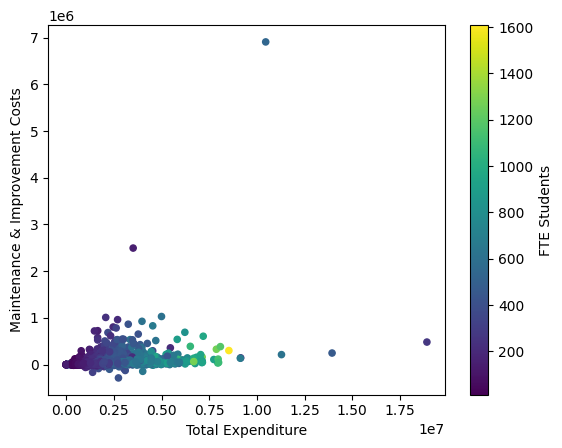

In [574]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [575]:
df['Maintenance & Improvement Costs'].corr(df['Total Expenditure'])

0.2997539559905436

In [576]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs vs Total Expenditure Ratio  \
                                                                      mean   
Student Buckets                                                              
200                                                           0.02           
400                                                           0.02           
600                                                           0.02           
800                                                           0.02           
1000                                                          0.02           
1200                                                          0.02           
1400                                                          0.02           
1600                                                          0.04           

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.02  0.00  0.71  0.03  0.0  
400               0.02  0.00  0.49  0.02  0.0  
600               0.02  0.00  0.66  0.02  0.0  
800               0.01  0.00  0.23  0.02  0.0  
1000              0.01  0.00  0.11  0.02  0.0  
1200              0.01  0.00  0.06  0.02  0.0  
1400              0.02  0.01  0.04  0.02  0.0  
1600              0.04  0.04  0.04   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

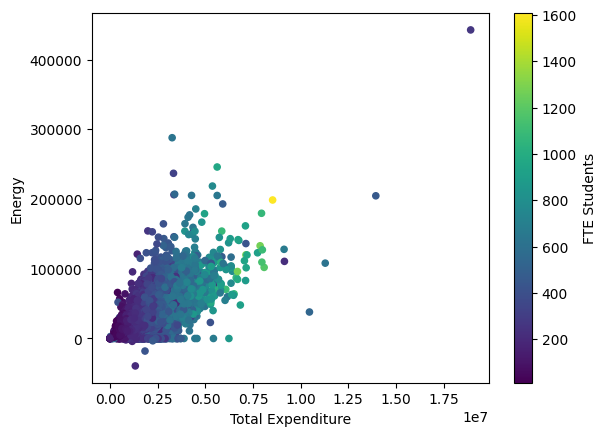

In [577]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [578]:
df['Energy'].corr(df['Total Expenditure'])

0.7100673286421342

In [579]:
df['Energy'].corr(df['FTE Students'])

0.6099088241401476

In [580]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy vs Total Expenditure Ratio                           \
                                             mean median   min   max   std   
Student Buckets                                                              
200                                          0.02   0.02  0.00  0.16  0.01   
400                                          0.02   0.02  0.00  0.08  0.01   
600                                          0.02   0.02  0.00  0.12  0.01   
800                                          0.02   0.02  0.00  0.09  0.01   
1000                                         0.02   0.02  0.01  0.04  0.01   
1200                                         0.02   0.01  0.01  0.03  0.01   
1400                                         0.02   0.02  0.01  0.02  0.00   
1600                                         0.02   0.02  0.02  0.02   NaN   

                      
                 var  
Student Buckets       
200              0.0  
400              0.0  
600              0.0  
800              0.0  
1000             0.0  
1200             0.0  
1400             0.0  
1600             NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

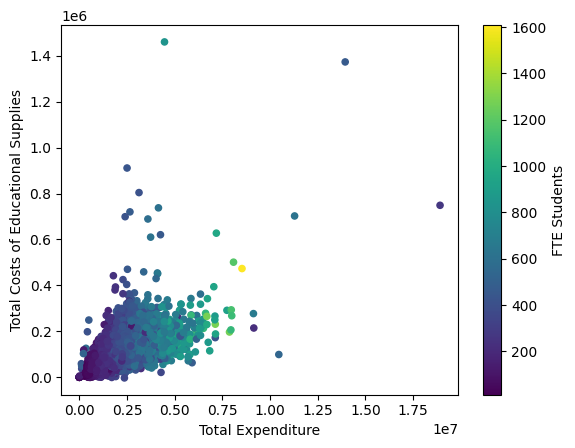

In [581]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [582]:
df['Total Costs of Educational Supplies'].corr(df['Total Expenditure'])

0.6913153403155397

In [583]:
df['Total Costs of Educational Supplies'].corr(df['FTE Students'])

0.6476949098600316

In [584]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies vs Total Expenditure Ratio  \
                                                                          mean   
Student Buckets                                                                  
200                                                           0.06               
400                                                           0.05               
600                                                           0.05               
800                                                           0.04               
1000                                                          0.04               
1200                                                          0.04               
1400                                                          0.03               
1600                                                          0.06               

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.05  0.00  0.52  0.02  0.0  
400               0.05  0.00  0.29  0.02  0.0  
600               0.05  0.01  0.55  0.03  0.0  
800               0.04  0.01  0.18  0.02  0.0  
1000              0.04  0.02  0.33  0.04  0.0  
1200              0.03  0.03  0.06  0.01  0.0  
1400              0.03  0.03  0.04  0.01  0.0  
1600              0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

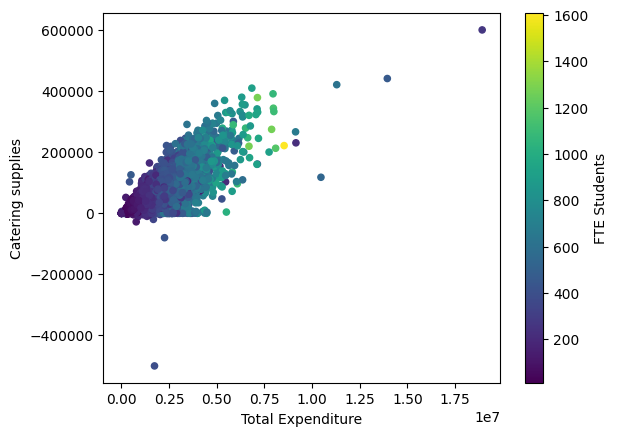

In [585]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [586]:
df['Catering supplies'].corr(df['Total Expenditure'])

0.7780280621745199

In [587]:
df['Catering supplies'].corr(df['FTE Students'])

0.7077884646911506

In [588]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.04   0.04  0.00   
400                                                     0.04   0.04  0.00   
600                                                     0.04   0.04  0.00   
800                                                     0.04   0.04  0.00   
1000                                                    0.04   0.04  0.00   
1200                                                    0.03   0.04  0.00   
1400                                                    0.04   0.03  0.03   
1600                                                    0.03   0.03  0.03   

                                  
                  max   std  var  
Student Buckets                   
200              0.60  0.02  0.0  
400              0.11  0.01  0.0  
600              0.25  0.02  0.0  
800              0.08  0.01  0.0  
1000             0.07  0.01  0.0  
1200             0.05  0.02  0.0  
1400             0.05  0.01  0.0  
1600             0.03   NaN  NaN

In [589]:
df[['READPROG', 'WRITPROG', 'MATPROG']].isna().sum()

READPROG    0
WRITPROG    0
MATPROG     0
dtype: int64

In [590]:
# Start working with progress
df['Progress'] = (df['READPROG'] + df['WRITPROG'] + df['MATPROG']) / 3

<Axes: >

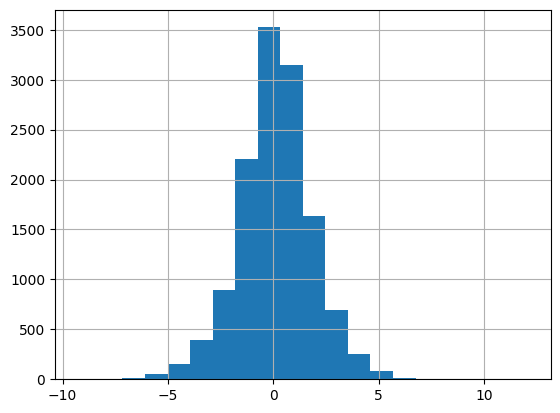

In [591]:
df['Progress'].hist(bins=20)

Correlation 'Progress' to 'Percent Students FSM': -0.11240206372313008
Correlation 'Progress' to 'Percent Students EHCP':  -0.07107492207721182
Correlation 'Progress' to 'Percent Students SEN':  -0.12263417620808295
Correlation 'Progress' to 'Percent Students ESL':  0.16270026597469425


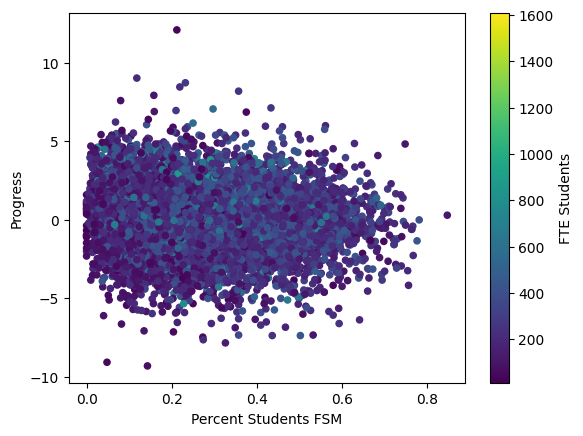

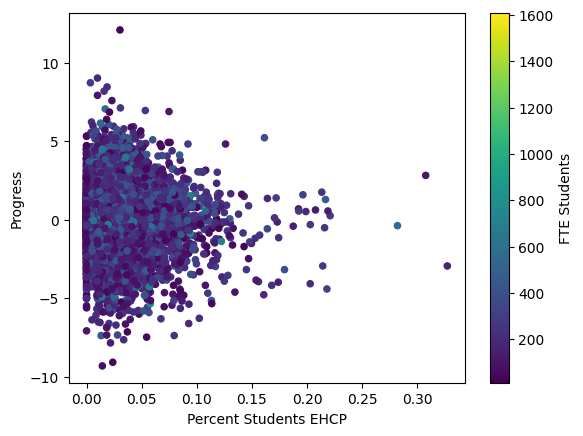

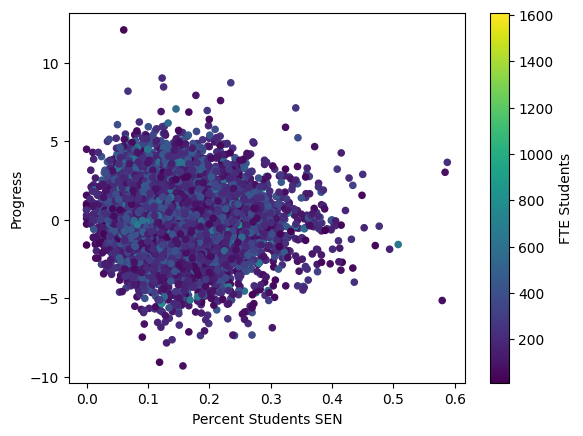

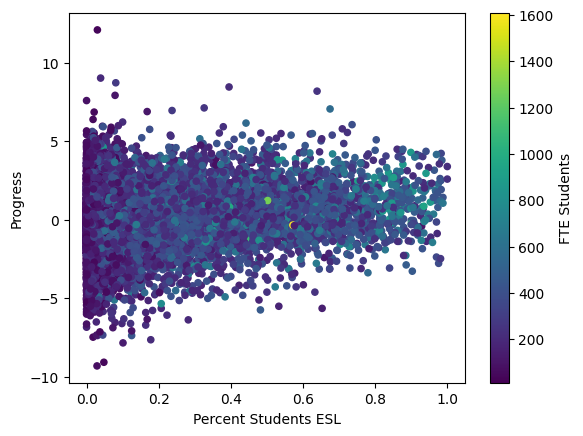

In [592]:
plot_student_groups('Progress')

<Axes: xlabel='Total Expenditure vs FTE Students Ratio', ylabel='Progress'>

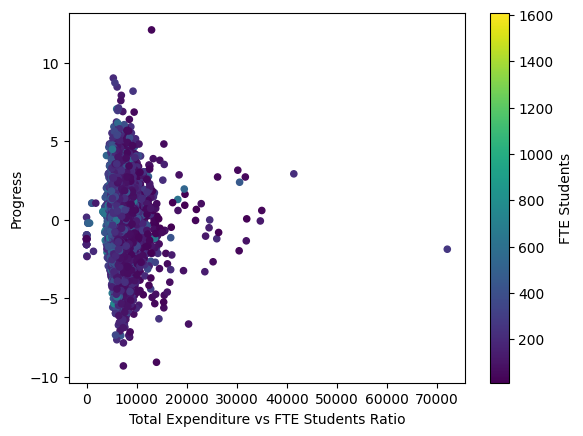

In [593]:
df.plot.scatter(x='Total Expenditure vs FTE Students Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='IE Ratio', ylabel='Progress'>

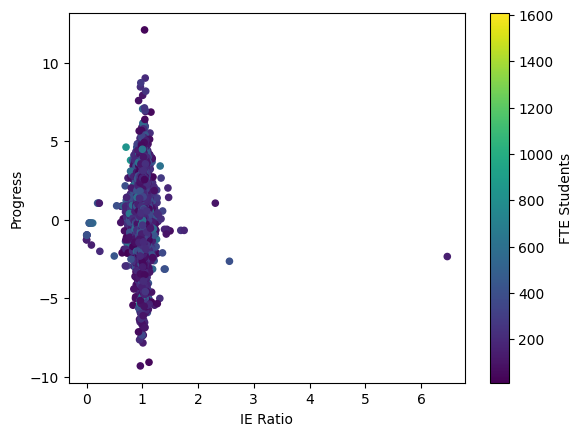

In [594]:
df.plot.scatter(x='IE Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='Total Expenditure vs FTE Students Ratio', ylabel='Progress'>

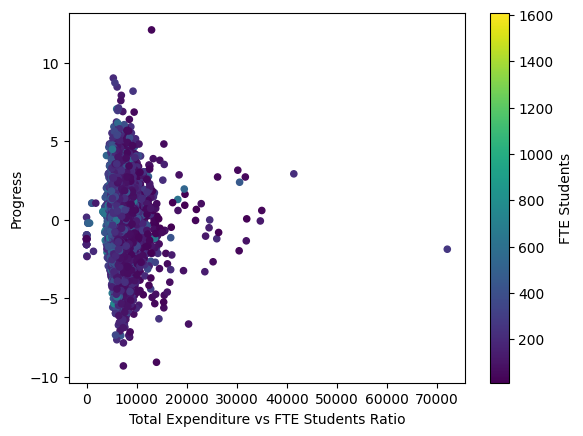

In [595]:
df.plot.scatter(x='Total Expenditure vs FTE Students Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='Other Staff Costs vs FTE Students Ratio', ylabel='Progress'>

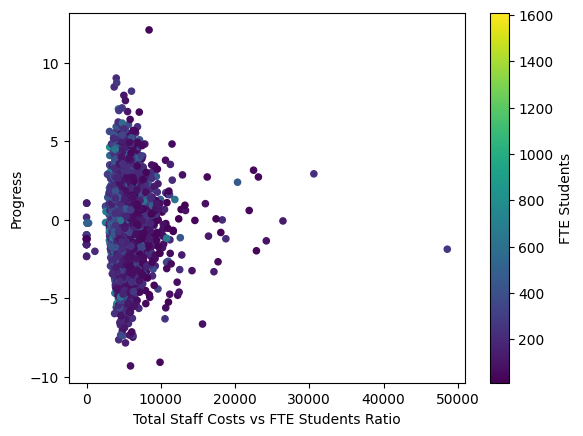

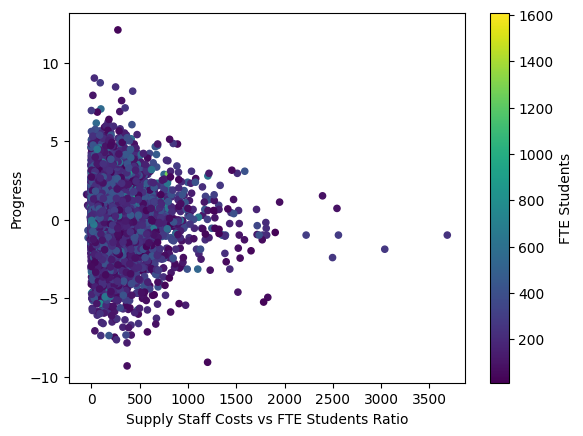

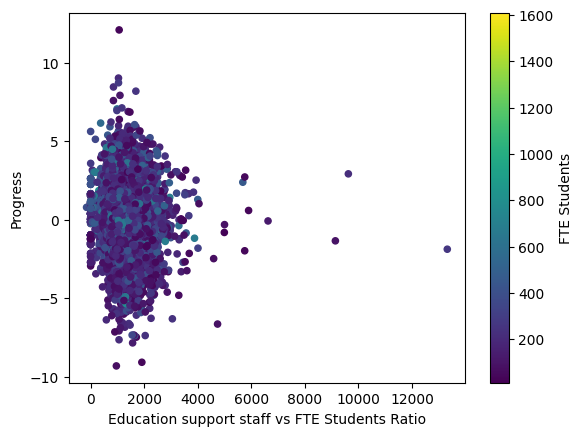

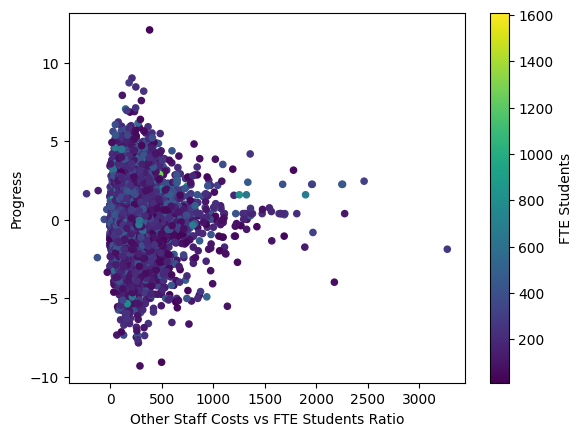

In [596]:
df.plot.scatter(x='Total Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Supply Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Education support staff vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Other Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')


<Axes: xlabel='Catering supplies', ylabel='Progress'>

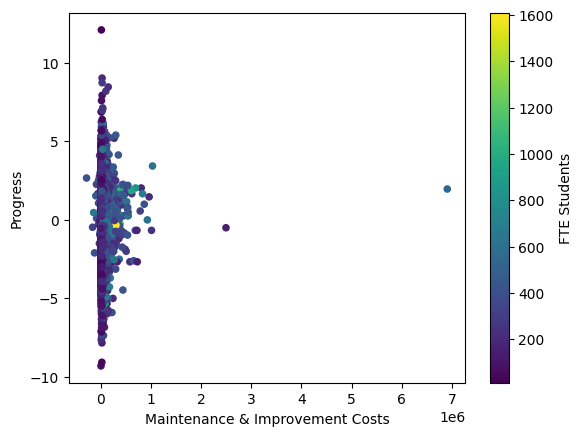

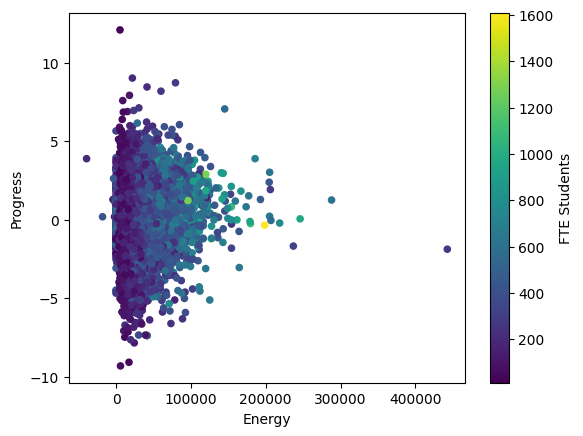

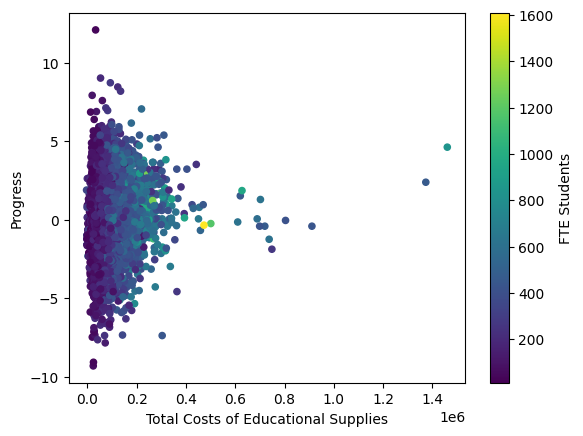

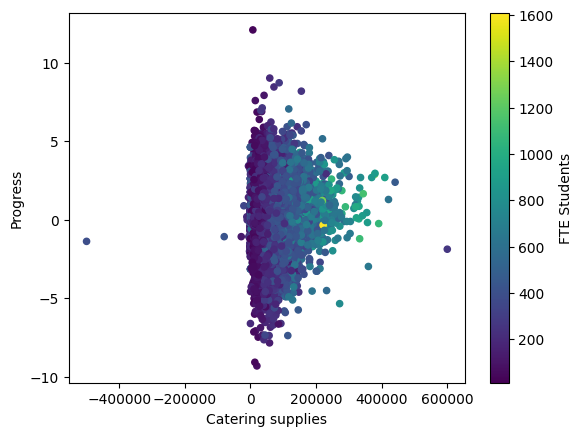

In [597]:

df.plot.scatter(x='Maintenance & Improvement Costs', y='Progress', c='FTE Students')
df.plot.scatter(x='Energy', y='Progress', c='FTE Students')
df.plot.scatter(x='Total Costs of Educational Supplies', y='Progress', c='FTE Students')
df.plot.scatter(x='Catering supplies', y='Progress', c='FTE Students')


<Axes: xlabel='FTE Teachers', ylabel='Progress'>

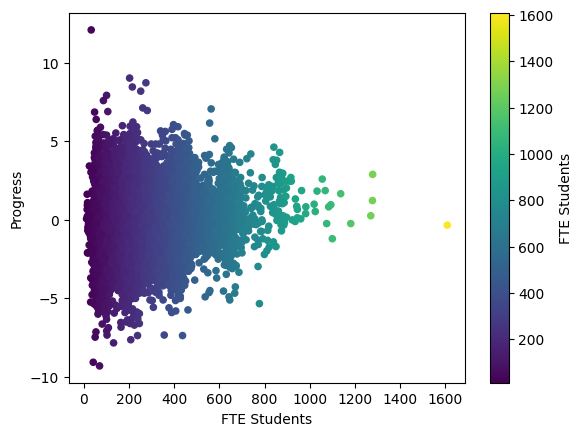

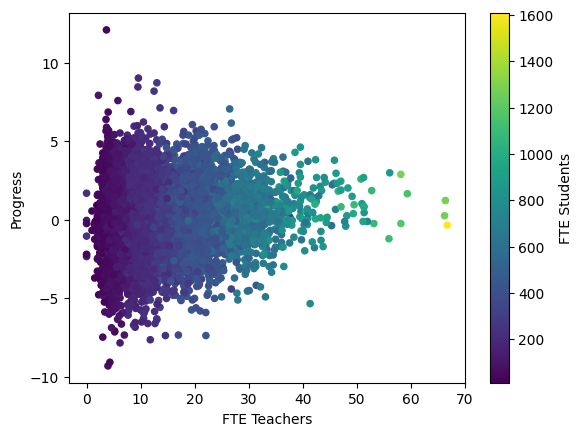

In [598]:
df.plot.scatter(x='FTE Students', y='Progress', c='FTE Students')
df.plot.scatter(x='FTE Teachers', y='Progress', c='FTE Students')


<Axes: xlabel='FTE Students', ylabel='Total Expenditure vs FTE Students Ratio'>

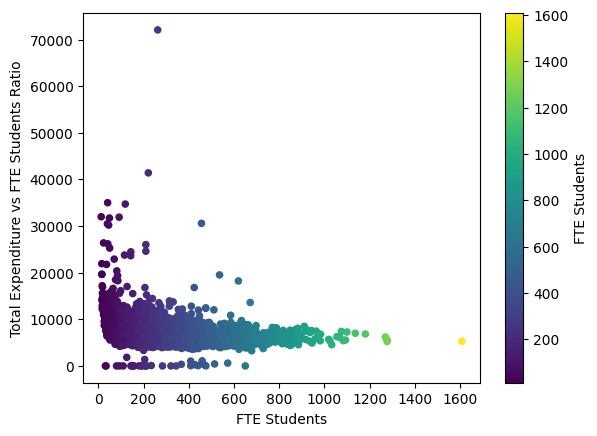

In [599]:
df.plot.scatter(x='FTE Students', y='Total Expenditure vs FTE Students Ratio', c='FTE Students')